In [137]:
#Librerias y funciones
import IPython
from scipy.io import wavfile
import numpy as np
from numpy import cos, pi, arange
from scipy.signal import lfilter, firwin, freqz
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from scipy.fft import fft, fftfreq

#Funcion para realizar un FFT de una señal (Usado en la tarea 3)
nsamples = 150
sample_rate = 8000

def plotfft(func):
    F = fft(func)
    tf = fftfreq(nsamples,1/sample_rate)
    return tf,F

def plotfftaudio(x,Fs):
    fouriertransform = fft(x)/len(x)
    fouriertransform = fouriertransform[range(int(len(x)/2))]

    tpCount = len(x)
    values = np.arange(int(tpCount/2))
    timePeriod = tpCount/Fs
    frequencies = values/timePeriod
    return frequencies, abs(fouriertransform)

# Parte 1: Procesado de señales de voz

In [138]:
#Audios de entrada
#Audios hombre
Fs_ha, ha = wavfile.read("ha.wav")
Fs_he, he = wavfile.read("he.wav")
Fs_hi, hi = wavfile.read("hi.wav")
Fs_ho, ho = wavfile.read("ho.wav")
Fs_hu, hu = wavfile.read("hu.wav")

#Audios mujer
Fs_ma, ma = wavfile.read("ma.wav")
Fs_me, me = wavfile.read("me.wav")
Fs_mi, mi = wavfile.read("mi.wav")
Fs_mo, mo = wavfile.read("mo.wav")
Fs_mu, mu = wavfile.read("mu.wav")

print(f"Fs_a hombre: {Fs_ha}")
print(f"Fs_a mujer: {Fs_ma}")

Fs_a hombre: 8000
Fs_a mujer: 8000


Si se desea determinar la frecuencia fundamental de una señal, una herramienta sumamente util es la transformada rapida de fourier que muestra la señal en el dominio de la frecuencia. Es por esto que se utilizara la fft para determinar la frecuencia experimental de cada persona, una mujer y un hombre.

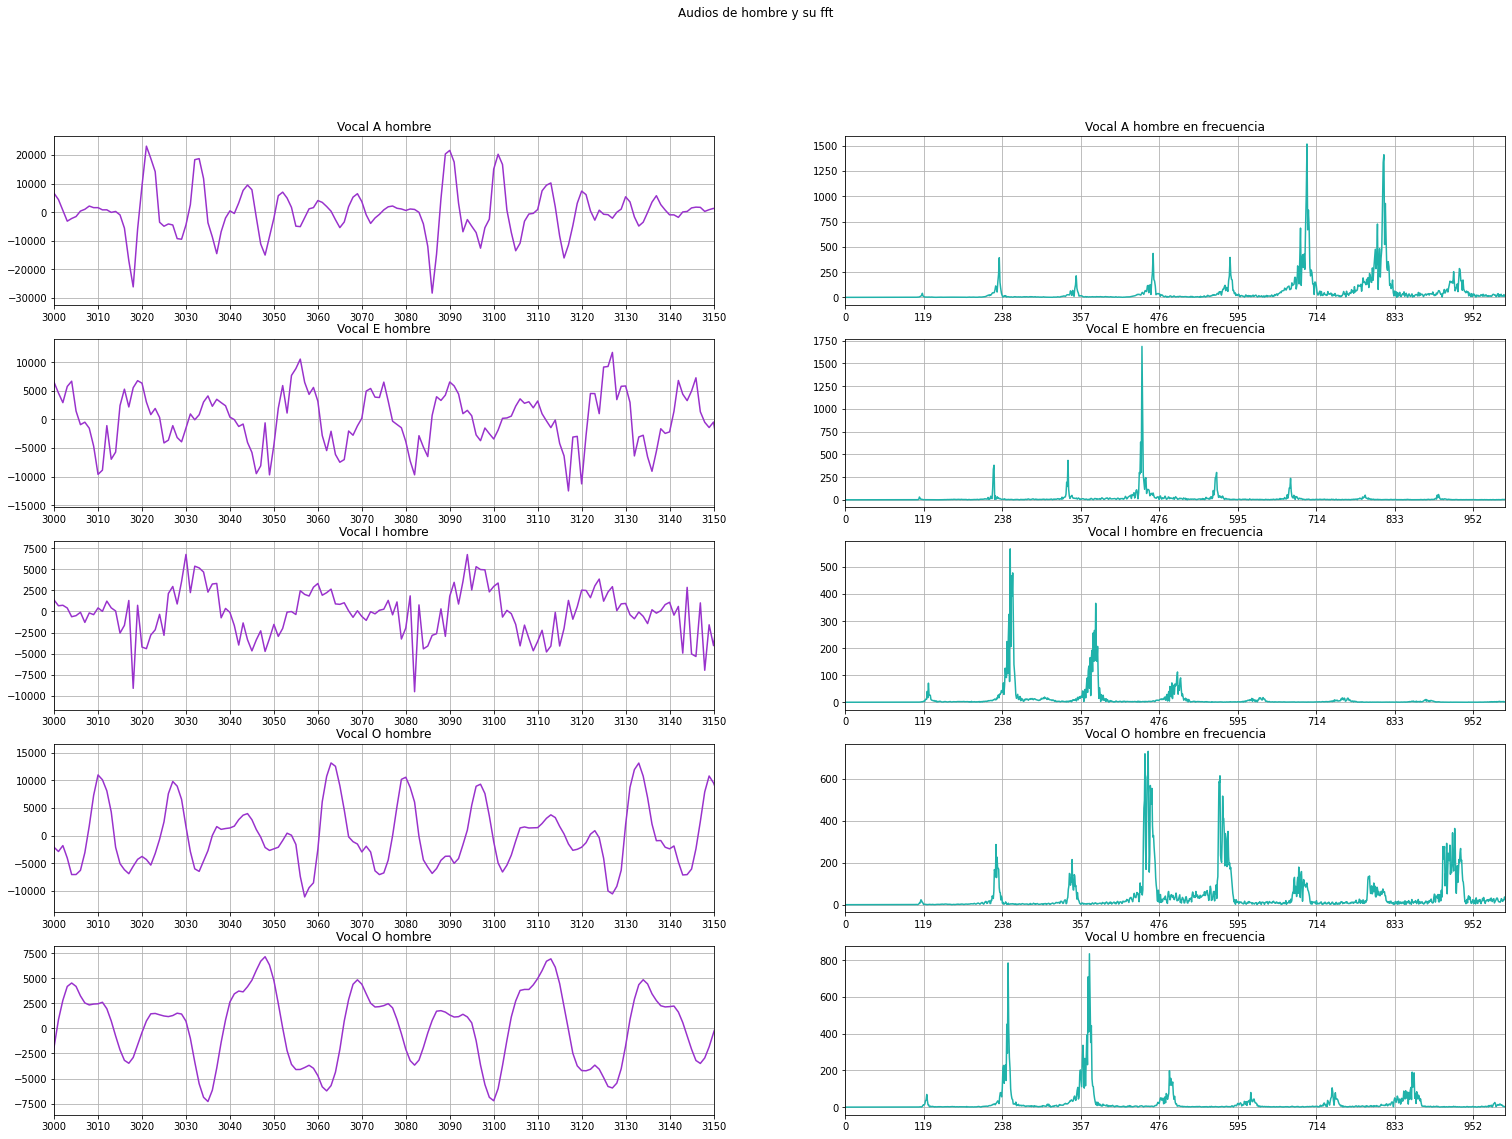

In [139]:
#Graficos de las diferentes vocales para un hombre y su fft
fig1, axs = plt.subplots(5,2,figsize=(26,18))
fig1.suptitle('Audios de hombre y su fft')

x = ha
Fs_x = Fs_ha
axs[0,0].plot(x,color='darkorchid')
axs[0,0].set(xlim=(3000,3000+nsamples))
axs[0,0].set_title('Vocal A hombre')
axs[0,0].xaxis.set_major_locator(MultipleLocator(10))
axs[0,0].grid()
Mf, M = plotfftaudio(x,Fs_x)
axs[0,1].set(xlim=(0,1000),xticks=(range(0,1000,119)))
axs[0,1].plot(Mf,M,color='lightseagreen')
axs[0,1].set_title('Vocal A hombre en frecuencia')
axs[0,1].grid()

x = he
Fs_x = Fs_he
axs[1,0].plot(x,color='darkorchid')
axs[1,0].set(xlim=(3000,3000+nsamples))
axs[1,0].set_title('Vocal E hombre')
axs[1,0].xaxis.set_major_locator(MultipleLocator(10))
axs[1,0].grid()
Mf, M = plotfftaudio(x,Fs_x)
axs[1,1].set(xlim=(0,1000),xticks=(range(0,1000,119)))
axs[1,1].plot(Mf,M,color='lightseagreen')
axs[1,1].set_title('Vocal E hombre en frecuencia')
axs[1,1].grid()

x = hi
Fs_x = Fs_hi
axs[2,0].plot(x,color='darkorchid')
axs[2,0].set(xlim=(3000,3000+nsamples))
axs[2,0].set_title('Vocal I hombre')
axs[2,0].xaxis.set_major_locator(MultipleLocator(10))
axs[2,0].grid()
Mf, M = plotfftaudio(x,Fs_x)
axs[2,1].set(xlim=(0,1000),xticks=(range(0,1000,119)))
axs[2,1].plot(Mf,M,color='lightseagreen')
axs[2,1].set_title('Vocal I hombre en frecuencia')
axs[2,1].grid()

x = ho
Fs_x = Fs_ho
axs[3,0].plot(x,color='darkorchid')
axs[3,0].set(xlim=(3000,3000+nsamples))
axs[3,0].set_title('Vocal O hombre')
axs[3,0].xaxis.set_major_locator(MultipleLocator(10))
axs[3,0].grid()
Mf, M = plotfftaudio(x,Fs_x)
axs[3,1].set(xlim=(0,1000),xticks=(range(0,1000,119)))
axs[3,1].plot(Mf,M,color='lightseagreen')
axs[3,1].set_title('Vocal O hombre en frecuencia')
axs[3,1].grid()

x = hu
Fs_x = Fs_hu
axs[4,0].plot(x,color='darkorchid')
axs[4,0].set(xlim=(3000,3000+nsamples))
axs[4,0].set_title('Vocal O hombre')
axs[4,0].xaxis.set_major_locator(MultipleLocator(10))
axs[4,0].grid()
Mf, M = plotfftaudio(x,Fs_x)
axs[4,1].set(xlim=(0,1000),xticks=(range(0,1000,119)))
axs[4,1].plot(Mf,M,color='lightseagreen')
axs[4,1].set_title('Vocal U hombre en frecuencia')
axs[4,1].grid()

plt.show()

Las divisiones en el dominio de la frecuencia se hacen cada 119 Hz esto debido a que el promedio de la frecuencia de la voz de los hombres es 119Hz, por lo tanto se utiliza como referencia.

Al observar las graficas de las diferentes vocales, dichas por un hombre se observa que la frecuencia fundamental es muy cercana a los 119 Hz. Si se utiliza la grafica para la vocal A, y se calcula experimentalmente la distancia entre crestas se tiene que es de 70, y Fs es de 8000, por lo tanto del calculo se obtiene que es aproximadamente 114 Hz, lo que confirma lo observado en la grafica de la fft, una frecuencia muy cercana a 119 Hz, como es de esperar para un hombre.

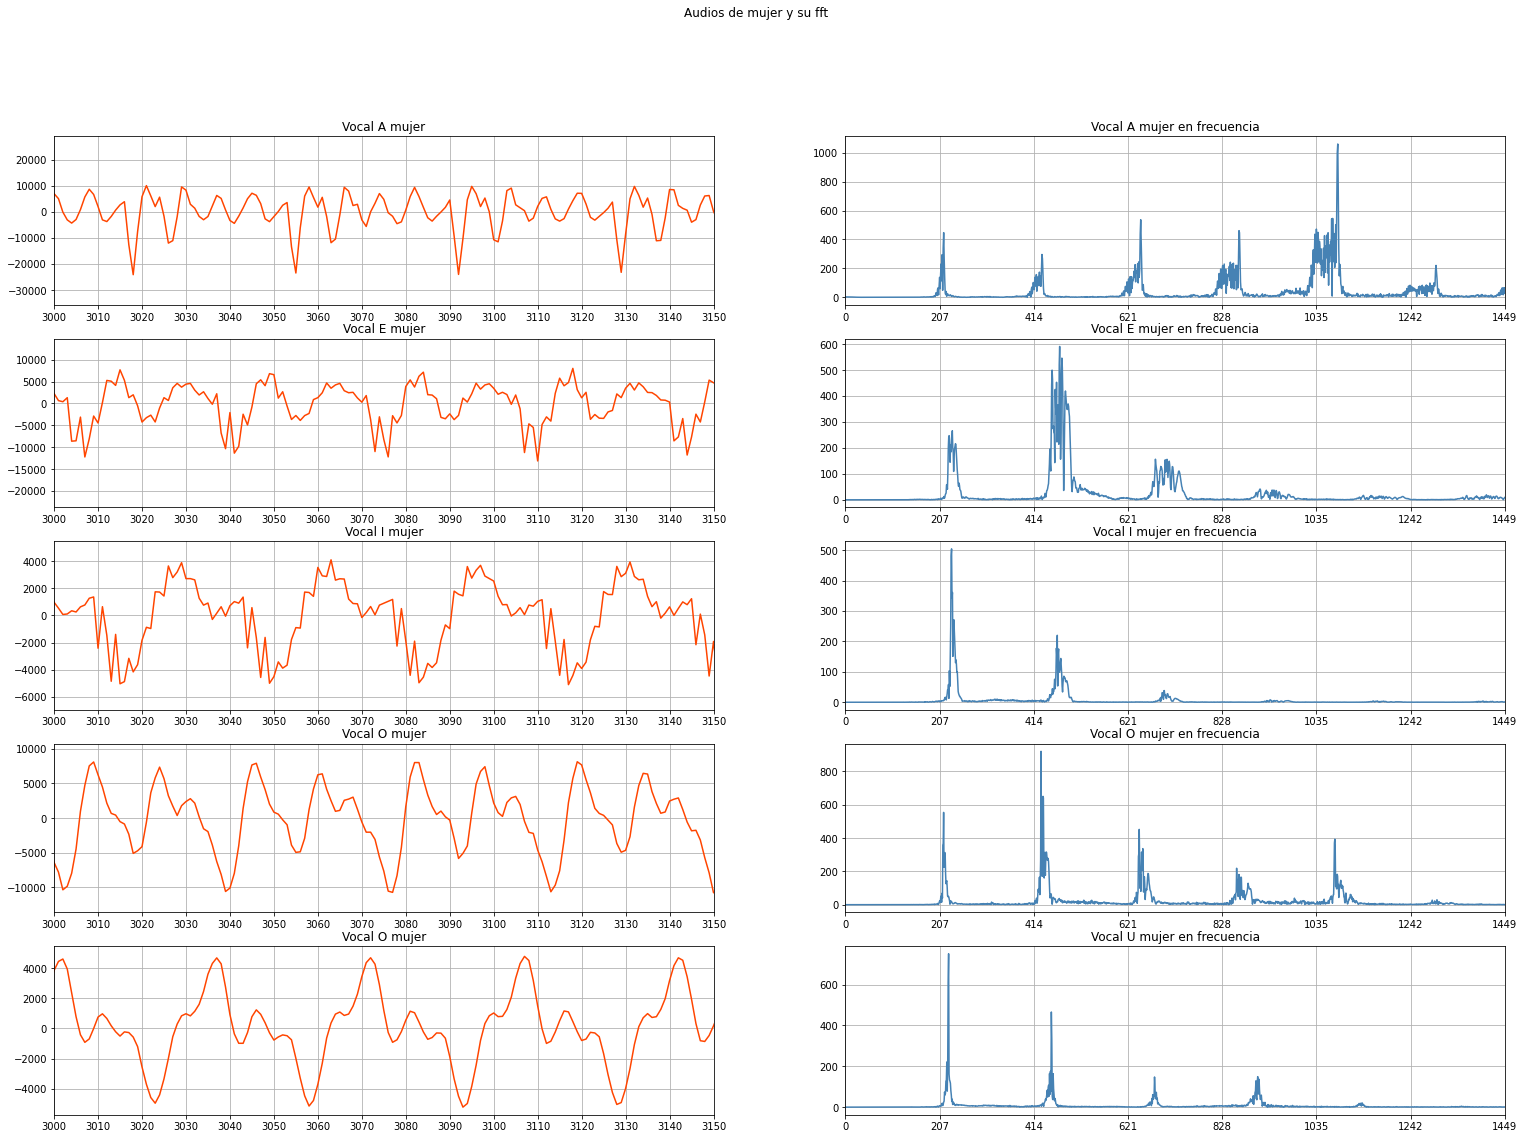

In [140]:
#Graficos de las diferentes vocales para una mujer y su fft
fig1, axs = plt.subplots(5,2,figsize=(26,18))
fig1.suptitle('Audios de mujer y su fft')

x = ma
Fs_x = Fs_ma
axs[0,0].plot(x,color='orangered')
axs[0,0].set(xlim=(3000,3000+nsamples))
axs[0,0].set_title('Vocal A mujer')
axs[0,0].xaxis.set_major_locator(MultipleLocator(10))
axs[0,0].grid()
Mf, M = plotfftaudio(x,Fs_x)
axs[0,1].set(xlim=(0,1000),xticks=(range(0,1500,207)))
axs[0,1].plot(Mf,M,color='steelblue')
axs[0,1].set_title('Vocal A mujer en frecuencia')
axs[0,1].grid()

x = me
Fs_x = Fs_me
axs[1,0].plot(x,color='orangered')
axs[1,0].set(xlim=(3000,3000+nsamples))
axs[1,0].set_title('Vocal E mujer')
axs[1,0].xaxis.set_major_locator(MultipleLocator(10))
axs[1,0].grid()
Mf, M = plotfftaudio(x,Fs_x)
axs[1,1].set(xlim=(0,1000),xticks=(range(0,1500,207)))
axs[1,1].plot(Mf,M,color='steelblue')
axs[1,1].set_title('Vocal E mujer en frecuencia')
axs[1,1].grid()

x = mi
Fs_x = Fs_mi
axs[2,0].plot(x,color='orangered')
axs[2,0].set(xlim=(3000,3000+nsamples))
axs[2,0].set_title('Vocal I mujer')
axs[2,0].xaxis.set_major_locator(MultipleLocator(10))
axs[2,0].grid()
Mf, M = plotfftaudio(x,Fs_x)
axs[2,1].set(xlim=(0,1000),xticks=(range(0,1500,207)))
axs[2,1].plot(Mf,M,color='steelblue')
axs[2,1].set_title('Vocal I mujer en frecuencia')
axs[2,1].grid()

x = mo
Fs_x = Fs_mo
axs[3,0].plot(x,color='orangered')
axs[3,0].set(xlim=(3000,3000+nsamples))
axs[3,0].set_title('Vocal O mujer')
axs[3,0].xaxis.set_major_locator(MultipleLocator(10))
axs[3,0].grid()
Mf, M = plotfftaudio(x,Fs_x)
axs[3,1].set(xlim=(0,1000),xticks=(range(0,1500,207)))
axs[3,1].plot(Mf,M,color='steelblue')
axs[3,1].set_title('Vocal O mujer en frecuencia')
axs[3,1].grid()

x = mu
Fs_x = Fs_mu
axs[4,0].plot(x,color='orangered')
axs[4,0].set(xlim=(3000,3000+nsamples))
axs[4,0].set_title('Vocal O mujer')
axs[4,0].xaxis.set_major_locator(MultipleLocator(10))
axs[4,0].grid()
Mf, M = plotfftaudio(x,Fs_x)
axs[4,1].set(xlim=(0,1000),xticks=(range(0,1500,207)))
axs[4,1].plot(Mf,M,color='steelblue')
axs[4,1].set_title('Vocal U mujer en frecuencia')
axs[4,1].grid()

plt.show()

Las divisiones en el dominio de la frecuencia se hacen cada 207 Hz esto debido a que el promedio de la frecuencia de la voz de las mujeres es 207 Hz, por lo tanto se utiliza como referencia.

Al observar las graficas de las diferentes vocales, dichas por una mujer se observa que la frecuencia fundamental es muy cercana a los 207 Hz. Si se utiliza la grafica para la vocal A, y se calcula experimentalmente la distancia entre crestas se tiene que es de 38, y Fs es de 8000, por lo tanto del calculo se obtiene que es aproximadamente 210 Hz, lo que confirma lo observado en la grafica de la fft, una frecuencia muy cercana a 207 Hz, como es de esperar para una mujer.

A continuacion se muestran las graficas correspondientes a la letra A tanto para hombre como para mujer.

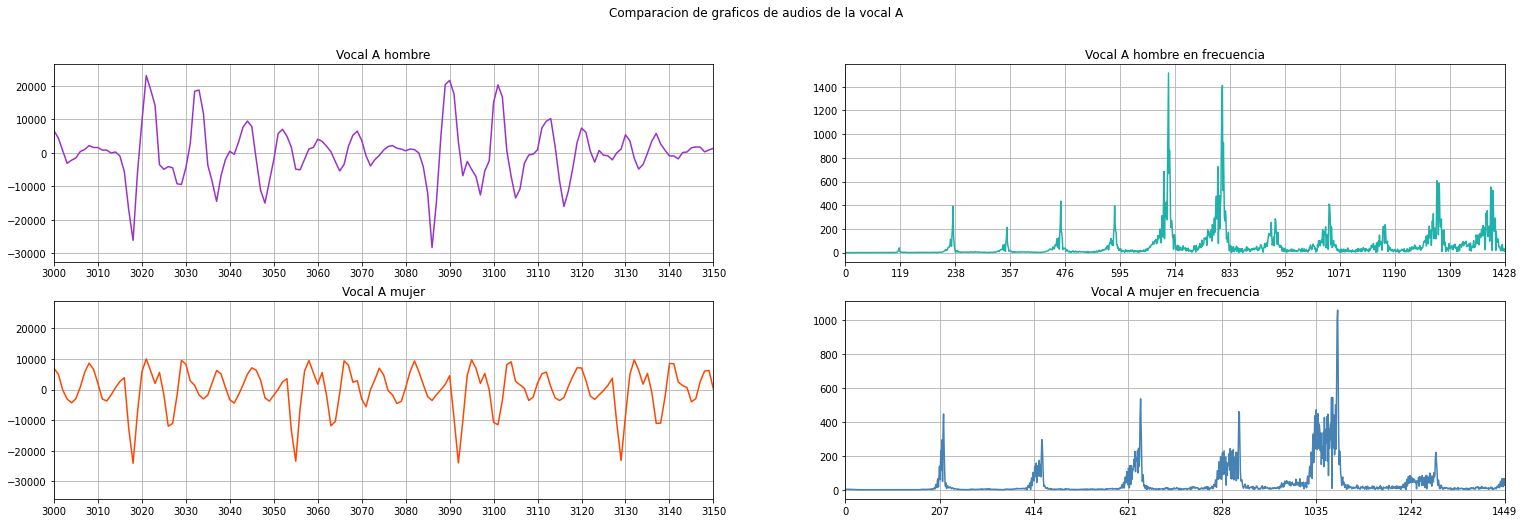

In [141]:
#Graficos de las diferentes vocales para una mujer y su fft
fig1, axs = plt.subplots(2,2,figsize=(26,8))
fig1.suptitle('Comparacion de graficos de audios de la vocal A')

x = ha
Fs_x = Fs_ha
axs[0,0].plot(x,color='darkorchid')
axs[0,0].set(xlim=(3000,3000+nsamples))
axs[0,0].set_title('Vocal A hombre')
axs[0,0].xaxis.set_major_locator(MultipleLocator(10))
axs[0,0].grid()
Mf, M = plotfftaudio(x,Fs_x)
axs[0,1].set(xlim=(0,1000),xticks=(range(0,1500,119)))
axs[0,1].plot(Mf,M,color='lightseagreen')
axs[0,1].set_title('Vocal A hombre en frecuencia')
axs[0,1].grid()

x = ma
Fs_x = Fs_ma
axs[1,0].plot(x,color='orangered')
axs[1,0].set(xlim=(3000,3000+nsamples))
axs[1,0].set_title('Vocal A mujer')
axs[1,0].xaxis.set_major_locator(MultipleLocator(10))
axs[1,0].grid()
Mf, M = plotfftaudio(x,Fs_x)
axs[1,1].set(xlim=(0,1000),xticks=(range(0,1500,207)))
axs[1,1].plot(Mf,M,color='steelblue')
axs[1,1].set_title('Vocal A mujer en frecuencia')
axs[1,1].grid()

plt.show()

Como se sabe, a los tonos agudos se atribuyen frecuencias mas altas, y por lo general la voz de una mujer tiene un tono mas agudo que la del hombre, por lo tanto una frecuencia mayor, esto justifica la diferencia entre las frecuencias obtenidas en esta tarea. Asimismo, si se observan las graficas se aprecia la diferencia entre las frecuencias en la fft correspondiente a cada señal.

# Parte 2: Filtrado digital

In [142]:
#Definicion de variables y señales

#------------------------------------------------
# Espacio temporal
#------------------------------------------------
T = 4/60
nsamples = 400
sample_rate = nsamples/T

#------------------------------------------------
# Señal de entrada (60Hz, 180Hz, 360Hz)
#------------------------------------------------
t = arange(nsamples) / sample_rate
f1 = 60
f2 = 180
f3 = 360
x1 = cos(2*pi*f1*t)
x2 = cos(2*pi*f2*t)
x3 = cos(2*pi*f3*t)
x = x1 + x2 + x3

def plotfft(func):
    F = fft(func)
    tf = fftfreq(nsamples, 1/sample_rate)
    return tf,F

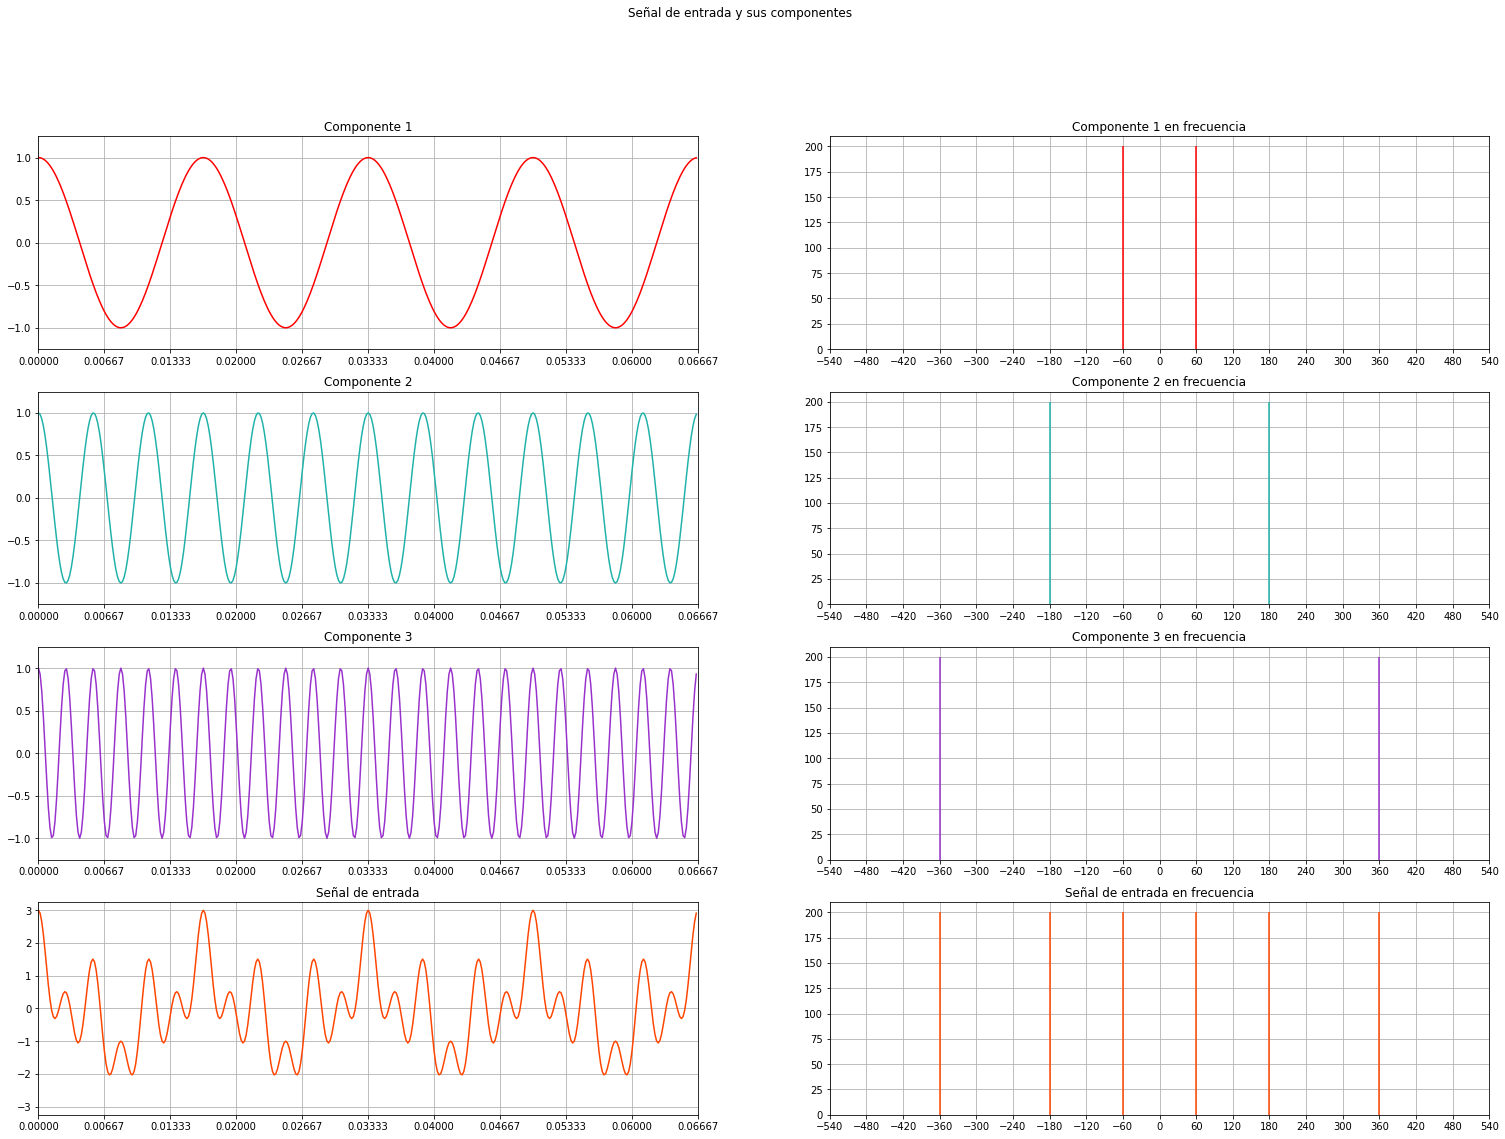

In [143]:
#Plot de las señales
fig1, axs = plt.subplots(4,2,figsize=(26,18))
fig1.suptitle('Señal de entrada y sus componentes')

axs[0,0].plot(t,x1,color='red')
axs[0,0].set_title('Componente 1')
axs[0,0].set(xlim=(0,T),ylim=(-1.25,1.25))
axs[0,0].xaxis.set_major_locator(MultipleLocator(T/10))
axs[0,0].grid()

Mtf, M = plotfft(x1)
axs[0,1].set(xlim=(-100,100),ylim=(0,210),xticks=(range(-540,580,60)))
axs[0,1].vlines(Mtf,0,np.abs(M),color='red')
axs[0,1].set_title('Componente 1 en frecuencia')
axs[0,1].grid()

axs[1,0].plot(t,x2,color='lightseagreen')
axs[1,0].set_title('Componente 2')
axs[1,0].set(xlim=(0,T),ylim=(-1.25,1.25))
axs[1,0].xaxis.set_major_locator(MultipleLocator(T/10))
axs[1,0].grid()

Mtf, M = plotfft(x2)
axs[1,1].set(xlim=(-100,100),ylim=(0,210),xticks=(range(-540,580,60)))
axs[1,1].vlines(Mtf,0,np.abs(M),color='lightseagreen')
axs[1,1].set_title('Componente 2 en frecuencia')
axs[1,1].grid()

axs[2,0].plot(t,x3,color='darkorchid')
axs[2,0].set_title('Componente 3')
axs[2,0].set(xlim=(0,T),ylim=(-1.25,1.25))
axs[2,0].xaxis.set_major_locator(MultipleLocator(T/10))
axs[2,0].grid()

Mtf, M = plotfft(x3)
axs[2,1].set(xlim=(-100,100),ylim=(0,210),xticks=(range(-540,580,60)))
axs[2,1].vlines(Mtf,0,np.abs(M),color='darkorchid')
axs[2,1].set_title('Componente 3 en frecuencia')
axs[2,1].grid()

axs[3,0].plot(t,x,color='orangered')
axs[3,0].set_title('Señal de entrada')
axs[3,0].set(xlim=(0,T),ylim=(-3.25,3.25))
axs[3,0].xaxis.set_major_locator(MultipleLocator(T/10))
axs[3,0].grid()

Mtf, M = plotfft(x)
axs[3,1].set(xlim=(-100,100),ylim=(0,210),xticks=(range(-540,580,60)))
axs[3,1].vlines(Mtf,0,np.abs(M),color='orangered')
axs[3,1].set_title('Señal de entrada en frecuencia')
axs[3,1].grid()


plt.show()

## Filtro FIR

In [152]:
# Filtro FIR para filtrar componente 1

def bandpass_firwin(ntaps, lowcut, highcut, fs=sample_rate, window='hamming'):
    nyq = 0.5 * fs
    taps = firwin(ntaps, [lowcut, highcut], nyq=nyq, pass_zero=False,
                  window=window, scale=False)
    return taps

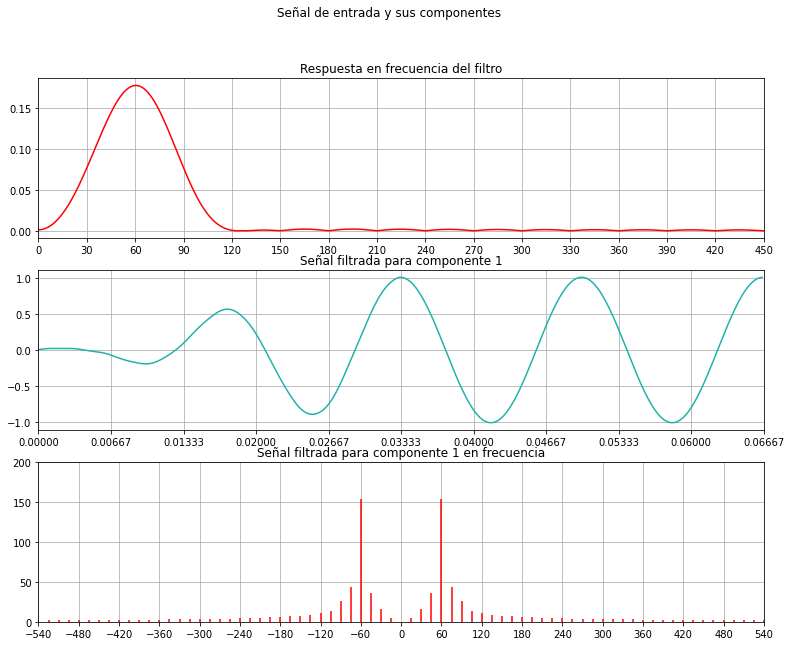

In [145]:
# Filtrado de la Componente 1
lowcut1 = f1-5
highcut1 = f1+5

ntaps = 200
taps_hamming1 = bandpass_firwin(ntaps, lowcut1, highcut1, fs=sample_rate)
# Use lfilter to filter x with the FIR filter.
filtered_x1 = 5.71*lfilter(taps_hamming1, 1.0, x)


#Plot de las señales
fig1, axs = plt.subplots(3,1,figsize=(13,10))
fig1.suptitle('Señal de entrada y sus componentes')

w, h = freqz(taps_hamming1, 1, worN=2000)
axs[0].plot((sample_rate * 0.5 / np.pi) * w,abs(h),color='red')
axs[0].set_title('Respuesta en frecuencia del filtro')
axs[0].set(xlim=(0,450))
axs[0].xaxis.set_major_locator(MultipleLocator(30))
axs[0].grid()

axs[1].plot(t,filtered_x1,color='lightseagreen')
axs[1].set_title('Señal filtrada para componente 1')
axs[1].set(xlim=(0,T))
axs[1].xaxis.set_major_locator(MultipleLocator(T/10))
axs[1].grid()

Mtf, M = plotfft(filtered_x1)
axs[2].set(xlim=(-100,100),ylim=(0,200),xticks=(range(-540,580,60)))
axs[2].vlines(Mtf,0,np.abs(M),color='red')
axs[2].set_title('Señal filtrada para componente 1 en frecuencia')
axs[2].grid()

plt.show()

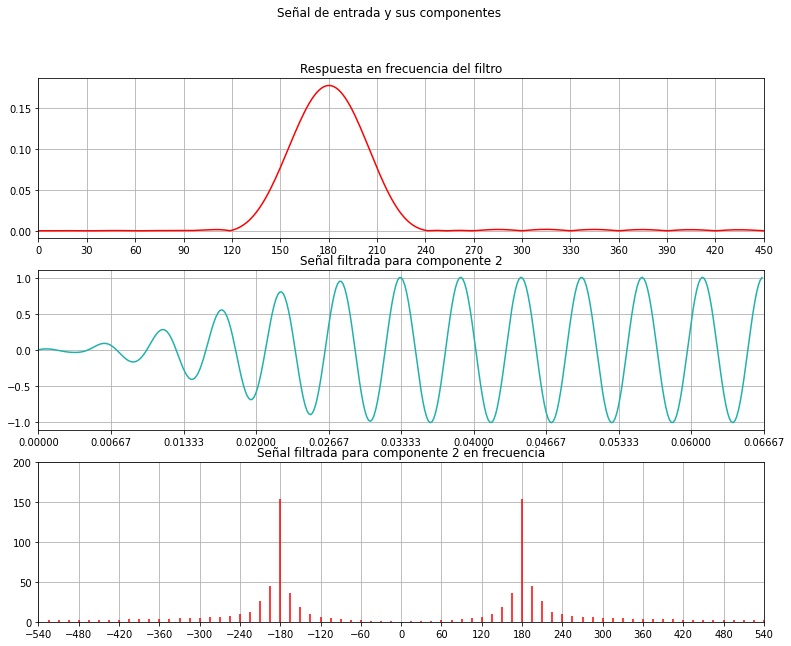

In [153]:
# Filtrado de la Componente 1
lowcut2 = f2-5
highcut2 = f2+5

ntaps = 200
taps_hamming2 = bandpass_firwin(ntaps, lowcut2, highcut2, fs=sample_rate)
# Use lfilter to filter x with the FIR filter.
filtered_x2 = 5.71*lfilter(taps_hamming2, 1.0, x)


#Plot de las señales
fig1, axs = plt.subplots(3,1,figsize=(13,10))
fig1.suptitle('Señal de entrada y sus componentes')

w, h = freqz(taps_hamming2, 1, worN=2000)
axs[0].plot((sample_rate * 0.5 / np.pi) * w,abs(h),color='red')
axs[0].set_title('Respuesta en frecuencia del filtro')
axs[0].set(xlim=(0,450))
axs[0].xaxis.set_major_locator(MultipleLocator(30))
axs[0].grid()

axs[1].plot(t,filtered_x2,color='lightseagreen')
axs[1].set_title('Señal filtrada para componente 2')
axs[1].set(xlim=(0,T))
axs[1].xaxis.set_major_locator(MultipleLocator(T/10))
axs[1].grid()

Mtf, M = plotfft(filtered_x2)
axs[2].set(xlim=(-100,100),ylim=(0,200),xticks=(range(-540,580,60)))
axs[2].vlines(Mtf,0,np.abs(M),color='red')
axs[2].set_title('Señal filtrada para componente 2 en frecuencia')
axs[2].grid()

plt.show()

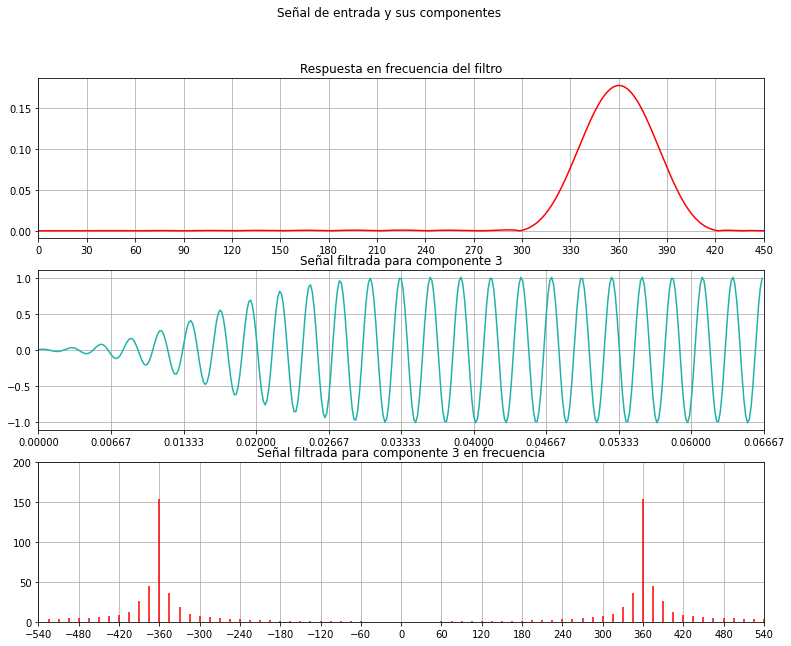

In [155]:
# Filtrado de la Componente 2
lowcut3 = f3-5
highcut3 = f3+5

ntaps = 200
taps_hamming3 = bandpass_firwin(ntaps, lowcut3, highcut3, fs=sample_rate)
# Use lfilter to filter x with the FIR filter.
filtered_x3 = 5.71*lfilter(taps_hamming3, 1.0, x)


#Plot de las señales
fig1, axs = plt.subplots(3,1,figsize=(13,10))
fig1.suptitle('Señal de entrada y sus componentes')

w, h = freqz(taps_hamming3, 1, worN=2000)
axs[0].plot((sample_rate * 0.5 / np.pi) * w,abs(h),color='red')
axs[0].set_title('Respuesta en frecuencia del filtro')
axs[0].set(xlim=(0,450))
axs[0].xaxis.set_major_locator(MultipleLocator(30))
axs[0].grid()

axs[1].plot(t,filtered_x3,color='lightseagreen')
axs[1].set_title('Señal filtrada para componente 3')
axs[1].set(xlim=(0,T))
axs[1].xaxis.set_major_locator(MultipleLocator(T/10))
axs[1].grid()

Mtf, M = plotfft(filtered_x3)
axs[2].set(xlim=(-100,100),ylim=(0,200),xticks=(range(-540,580,60)))
axs[2].vlines(Mtf,0,np.abs(M),color='red')
axs[2].set_title('Señal filtrada para componente 3 en frecuencia')
axs[2].grid()

plt.show()

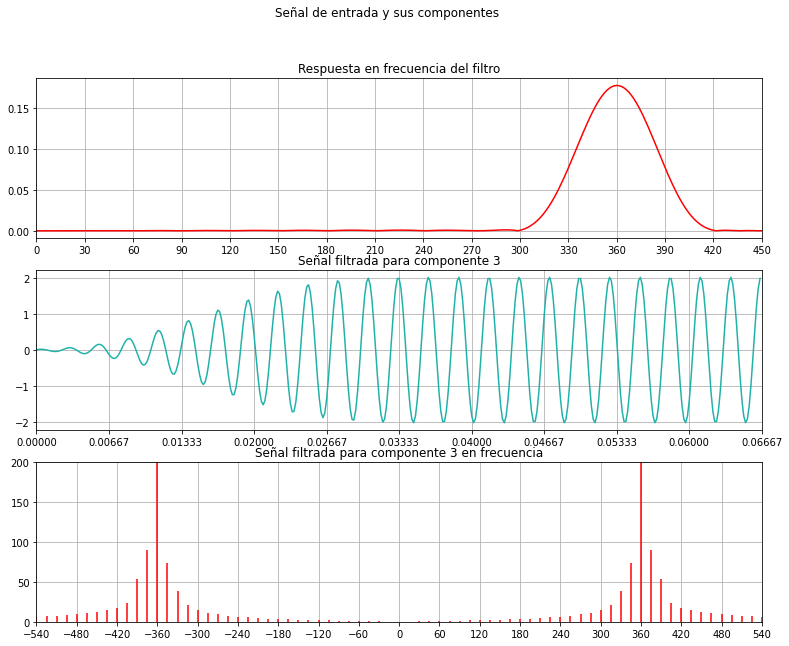

In [160]:
# Filtrado de la Componente 3
lowcut3 = f3-5
highcut3 = f3+5

ntaps = 200
taps_hamming3 = bandpass_firwin(ntaps, lowcut3, highcut3, fs=sample_rate)
# Use lfilter to filter x with the FIR filter.
filtered_x3 = 2*5.71*lfilter(taps_hamming3, 1.0, x)


#Plot de las señales
fig1, axs = plt.subplots(3,1,figsize=(13,10))
fig1.suptitle('Señal de entrada y sus componentes')

w, h = freqz(taps_hamming3, 1, worN=2000)
axs[0].plot((sample_rate * 0.5 / np.pi) * w,abs(h),color='red')
axs[0].set_title('Respuesta en frecuencia del filtro')
axs[0].set(xlim=(0,450))
axs[0].xaxis.set_major_locator(MultipleLocator(30))
axs[0].grid()

axs[1].plot(t,filtered_x3,color='lightseagreen')
axs[1].set_title('Señal filtrada para componente 3')
axs[1].set(xlim=(0,T))
axs[1].xaxis.set_major_locator(MultipleLocator(T/10))
axs[1].grid()

Mtf, M = plotfft(filtered_x3)
axs[2].set(xlim=(-100,100),ylim=(0,200),xticks=(range(-540,580,60)))
axs[2].vlines(Mtf,0,np.abs(M),color='red')
axs[2].set_title('Señal filtrada para componente 3 en frecuencia')
axs[2].grid()

plt.show()

## Filtro IIR

c:\Users\carlo\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<Figure size 432x288 with 0 Axes>

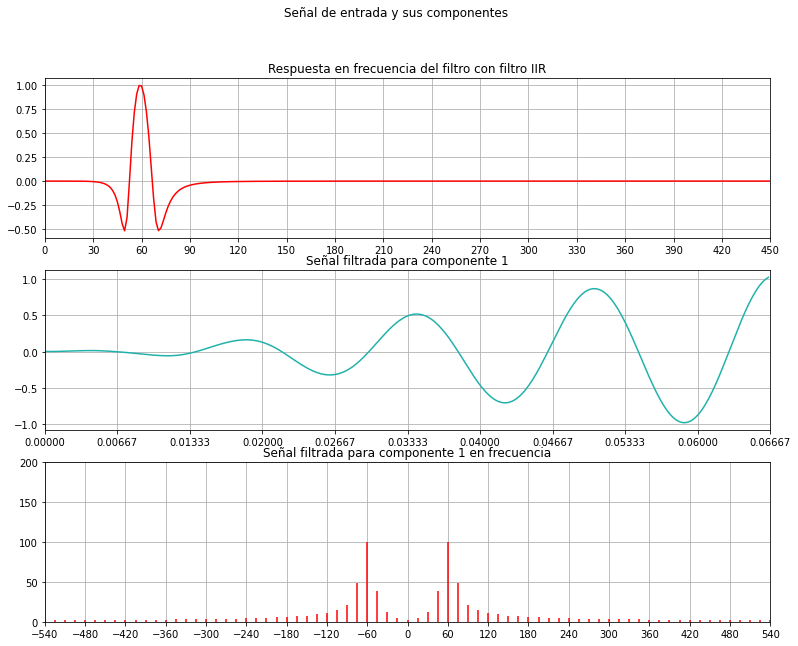

In [149]:
#------------------------------------------------
# Filtro IIR para filtrar componente 1
#------------------------------------------------
from  scipy import signal

def bandpass_IIR(N, Wn, fs):
    b, a = signal.iirfilter(N=N, Wn=Wn, btype='band',
                       analog=False, ftype='butter', fs=fs,
                       output='ba')
    w, h = signal.freqz(b, a, worN=2000, fs=fs)
    fig = plt.figure()
    return w, h, b, a

w, h, b, a = bandpass_IIR(2, [50, 70], fs=6000)

filtered_x1 = lfilter(b, a, x)


#Plot de las señales
fig1, axs = plt.subplots(3,1,figsize=(13,10))
fig1.suptitle('Señal de entrada y sus componentes')


axs[0].plot(w,h,color='red')
axs[0].set_title('Respuesta en frecuencia del filtro con filtro IIR')
axs[0].set(xlim=(0,450))
axs[0].xaxis.set_major_locator(MultipleLocator(30))
axs[0].grid()

axs[1].plot(t,filtered_x1,color='lightseagreen')
axs[1].set_title('Señal filtrada para componente 1')
axs[1].set(xlim=(0,T))
axs[1].xaxis.set_major_locator(MultipleLocator(T/10))
axs[1].grid()

Mtf, M = plotfft(filtered_x1)
axs[2].set(xlim=(-100,100),ylim=(0,200),xticks=(range(-540,580,60)))
axs[2].vlines(Mtf,0,np.abs(M),color='red')
axs[2].set_title('Señal filtrada para componente 1 en frecuencia')
axs[2].grid()

plt.show()

c:\Users\carlo\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<Figure size 432x288 with 0 Axes>

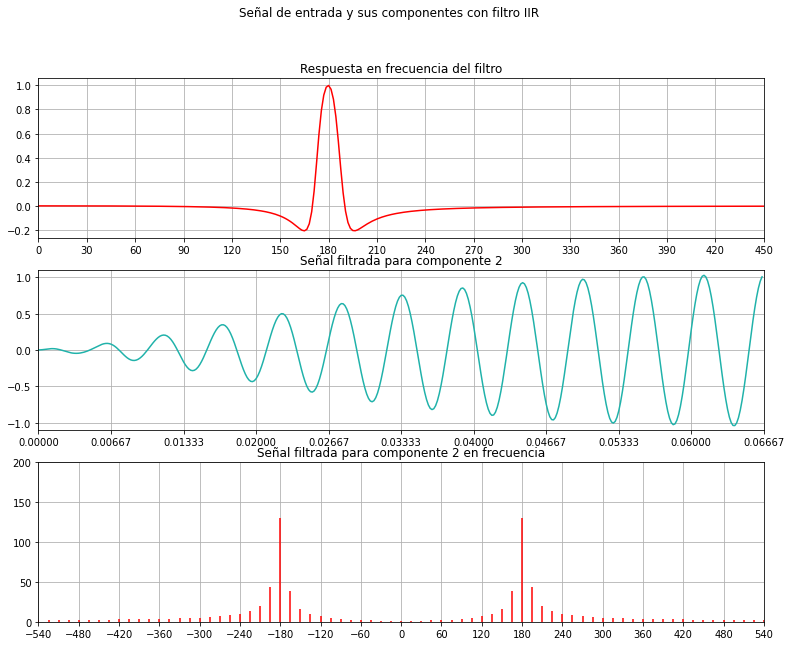

In [150]:
w, h, b, a = bandpass_IIR(1, [170, 190], 6000)

filtered_x2 = lfilter(b, a, x)


#Plot de las señales
fig1, axs = plt.subplots(3,1,figsize=(13,10))
fig1.suptitle('Señal de entrada y sus componentes con filtro IIR')


axs[0].plot(w,h,color='red')
axs[0].set_title('Respuesta en frecuencia del filtro')
axs[0].set(xlim=(0,450))
axs[0].xaxis.set_major_locator(MultipleLocator(30))
axs[0].grid()

axs[1].plot(t,filtered_x2,color='lightseagreen')
axs[1].set_title('Señal filtrada para componente 2')
axs[1].set(xlim=(0,T), ylim=(-1.1, 1.1))
axs[1].xaxis.set_major_locator(MultipleLocator(T/10))
axs[1].grid()

Mtf, M = plotfft(filtered_x2)
axs[2].set(xlim=(-100,100),ylim=(0,200),xticks=(range(-540,580,60)))
axs[2].vlines(Mtf,0,np.abs(M),color='red')
axs[2].set_title('Señal filtrada para componente 2 en frecuencia')
axs[2].grid()

plt.show()

c:\Users\carlo\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<Figure size 432x288 with 0 Axes>

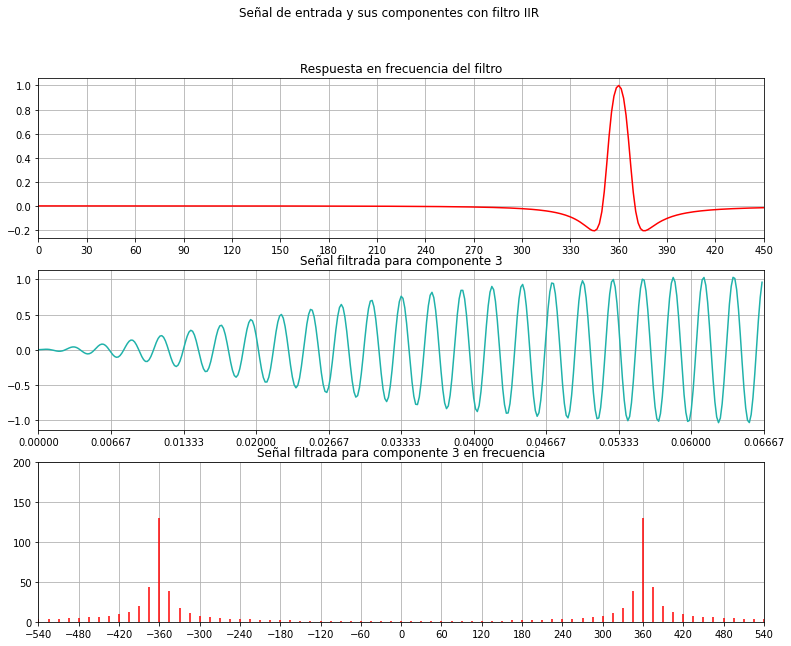

In [151]:
w, h, b, a = bandpass_IIR(1, [350, 370], 6000)

filtered_x3 = lfilter(b, a, x)


#Plot de las señales
fig1, axs = plt.subplots(3,1,figsize=(13,10))
fig1.suptitle('Señal de entrada y sus componentes con filtro IIR')


axs[0].plot(w,h,color='red')
axs[0].set_title('Respuesta en frecuencia del filtro')
axs[0].set(xlim=(0,450))
axs[0].xaxis.set_major_locator(MultipleLocator(30))
axs[0].grid()

axs[1].plot(t,filtered_x3,color='lightseagreen')
axs[1].set_title('Señal filtrada para componente 3')
axs[1].set(xlim=(0,T))
axs[1].xaxis.set_major_locator(MultipleLocator(T/10))
axs[1].grid()

Mtf, M = plotfft(filtered_x3)
axs[2].set(xlim=(-100,100),ylim=(0,200),xticks=(range(-540,580,60)))
axs[2].vlines(Mtf,0,np.abs(M),color='red')
axs[2].set_title('Señal filtrada para componente 3 en frecuencia')
axs[2].grid()

plt.show()

# Comparación de los filtros
## 60Hz
Analizando primero la forma del filtro como tal se puede observar en la respuesta al impulso del filtro que para el FIR se usa un filtro de primer orden mientras que para el IIR se usa uno de segundo orden, esto debido a que uno de primer orden no era capaz de separar completamente la componente de 180Hz, en cuanto al ancho de la banda el filtro IIR es más angosto que el FIR, en cuanto a la respuesta el IIR atenúa más la señal al ser un filtro de segundo orden por lo que se puede ver que es más afectado por las demás componentes de la señal.
## 180Hz
Para el filtrado de la segunda componente si fue posible implementar ambos filtros de primer orden, al igual que el caso anterior el filtro IIR tiene una banda bastante más angosta que el FIR y en cuanto a la señal filtrada, el filtro IIR crece más rápido que el FIR sin embargo tarda más en estabilizarse además en la frecuencia se puede ver como tiene las demás componentes de la frecuencia más atenuadas.
## 360 Hz
Para el filtrado a 360Hz presenta el mismo comportamiento qué las anteriores, el filtrado por IIR crece más rápidamente y llega a parecerse más rápido sin embargo no se estabiliza tan rápido, mientras que el FIR se estabiliza más rápido aunque observando la señal en el dominio de la frecuencia se puede ver que el filtro IIR realiza un mejor filtrado.


## Diseño de filtros digitales

### Diseño de un filtro FIR

Para el diseño del filtro pasabandas FIR se utilizo la funcion firwin, que diseña un filtro de tipo FIR utilizando el metodo de la ventana, que determina los coeficientes de la respuesta al impulso del filtro, con fase lineal. Para el diseño se necesita definir el numero de coeficientes para el filtro, las frecuencias de corte superior e inferior, la frecuencia de Nyquist de la señal por filtrar y el tipo de ventana.
1. El numero de coeficientes dependera de la aplicacion, entre menor sea el numero de coeficientes menor sera el tiempo de transicion para estabilizar la señal filtrada, sin embargo si es muy pequeño afecta la calidad del filtrado pues aumenta el ancho de banda del filtro, por lo que pasan frecuencias que no deberian. Si el numero aumenta, la calidad del filtro mejora y a su vez el coste computacional pues aumenta el tiempo de ejecucion, al igual que el tiempo de estabilizacion. Llegado cierto valor un aumento en el numero de coeficientes no afecta de forma significativa la calidad del filtro.
2. Las frecuencias de corte son bastante explicitas pues se debe definir las frecuencias que limitaran el ancho de banda que pase.
3. La frecuencia de Nyquist se calcula como la mitad de la frecuencia de la señal por filtrar.
4. El tipo de ventana varia y las opciones dependen de la funcion. Entre las opciones que ofrece estan: kaiser, hamming, remez, entre otras. En la imagen siguiente se muestra una comparacion entre estas, y debido a las caracteristicas de la ventana hamming fue que se selecciono para el filtrado.

![<caption>](firwin_windows.png)

### Diseño de un filtro IIR

Para el filtrado IIR se usó la librería signal de scipy la cual posee un comando llamado  scipy.signal.iirfilter el cual requiere de las entradas (N, Wn, rp=None, rs=None, btype='band', analog=False, ftype='butter', output='ba', fs=None).
De estas solo son importantes para este filtrado las siguientes:
btype: Se le indica el tipo de filtro (pasa altas, pasabajas, pasabanda).
analog: Ya qué estamos usando un filtro digital es importante indicarlo
ftype: Es el tipo de filtro.
fs: la frecuencia de muestreo del filtro.


 - Para la selección de los parámetros del filtro usado simplemente se le dió una banda de 20Hz para un filtro butterworth pasa bandas de primer orden y uno de segundo orden para la frecuencia de 60Hz.
 - Se eligió un filtro the Buuterworth buscando aplanar lo maximo posible la respuesta de la frecuencia para evitar el efecto de las otras 2 componentes y se usa un filtro de primer orden debido a que no se requiere una caida muy brusca ya que las componentes de frecuencia de la señal estan bastante espaciadas.
 - Como metodo de selección de los parámetros fue la prueba reiterativa prestando atención en la forma de la salida y en las componentes de la transformada de la señal.


![<caption>](IRR.png)